In [8]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
%matplotlib inline 
rng = numpy.random

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

In [3]:
# tf Graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# model weight
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="weight")

In [4]:
# construct linear model
pred = tf.add(tf.mul(W,X),b)

In [5]:
#cost function
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [6]:
#initialize
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.152958572 W= 0.40375 b= -0.307523
Epoch: 0100 cost= 0.144178107 W= 0.394582 b= -0.241566
Epoch: 0150 cost= 0.136411771 W= 0.385958 b= -0.179532
Epoch: 0200 cost= 0.129542500 W= 0.377848 b= -0.121188
Epoch: 0250 cost= 0.123466671 W= 0.37022 b= -0.0663131
Epoch: 0300 cost= 0.118092731 W= 0.363046 b= -0.0147022
Epoch: 0350 cost= 0.113339595 W= 0.356298 b= 0.0338392
Epoch: 0400 cost= 0.109135561 W= 0.349952 b= 0.0794938
Epoch: 0450 cost= 0.105417296 W= 0.343983 b= 0.122433
Epoch: 0500 cost= 0.102128625 W= 0.33837 b= 0.162818
Epoch: 0550 cost= 0.099219985 W= 0.33309 b= 0.200802
Epoch: 0600 cost= 0.096647486 W= 0.328124 b= 0.236526
Epoch: 0650 cost= 0.094372340 W= 0.323453 b= 0.270126
Epoch: 0700 cost= 0.092360117 W= 0.31906 b= 0.301727
Epoch: 0750 cost= 0.090580523 W= 0.314929 b= 0.331449
Epoch: 0800 cost= 0.089006655 W= 0.311043 b= 0.359403
Epoch: 0850 cost= 0.087614737 W= 0.307388 b= 0.385694
Epoch: 0900 cost= 0.086383782 W= 0.303951 b= 0.410422
Epoch: 0950 cost= 0.085

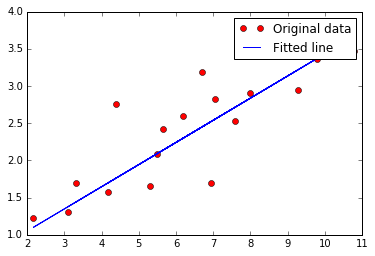

In [9]:
#launch graph
with tf.Session() as sess:
    sess.run(init)
    
    #fit
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
                
    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print "Training Cost =", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    
    #display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()